# Plot an instrument data vs another

In some cases, it may be interesting to plot the signal of an instrument vs the signal of another, rather than plotting the signals vs time.

## Set up

Generic libraries:

In [1]:
from functools import partial
from pathlib import Path
import tomllib

import numpy as np

Other libraries required for this notebook:

In [2]:
from multipac_testbench.multipactor_test import MultipactorTest
import multipac_testbench.instruments as ins
from multipac_testbench.util.post_treaters import running_mean
from multipac_testbench.util.multipactor_detectors import \
    quantity_is_above_threshold

Define the project path, load the configuration.

In [3]:
project = Path("../data/campaign")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

In [4]:
filepath = Path(project, "120MHz_SWR4.csv")
multipactor_test = MultipactorTest(filepath,
                                   freq_mhz=120.,
                                   swr=4.,
                                   config=config,
                                   sep='\t')

In [5]:
exclude = "NI9205_E1", "NI9205_MP1l"
x_instrument = ins.FieldProbe
y_instrument = ins.CurrentProbe
figsize = (8, 8)

## Smooth and produce basic plot

Smooth the current data

In [6]:
current_smoother = partial(
    running_mean,
    n_mean=10,
    mode='same',
)

multipactor_test.add_post_treater(
    current_smoother,
    ins.CurrentProbe,
)

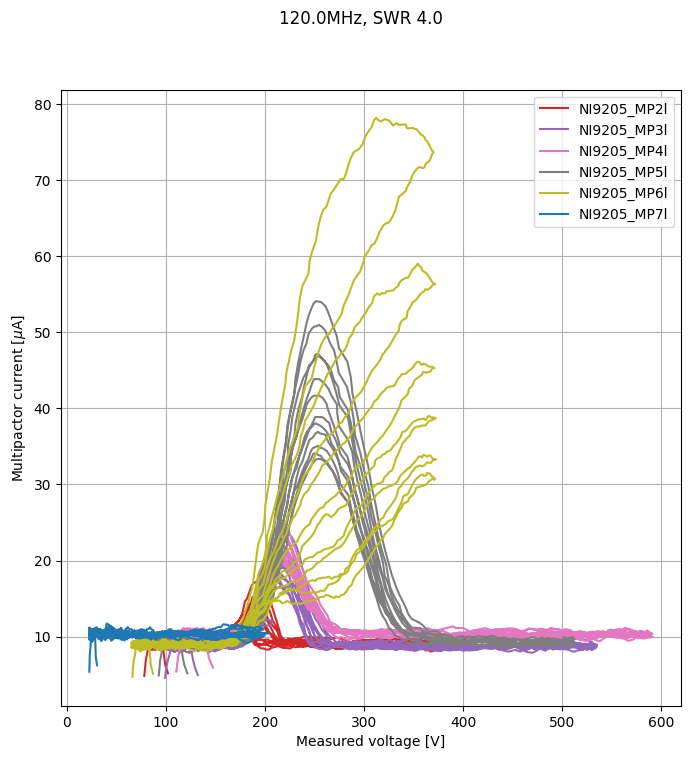

In [7]:
_, _ = multipactor_test.sweet_plot(
    y_instrument,
    xdata=x_instrument,
    exclude=exclude,
    figsize=figsize,
)

## Some plotting options

It is possible to take only the `tail` last points:

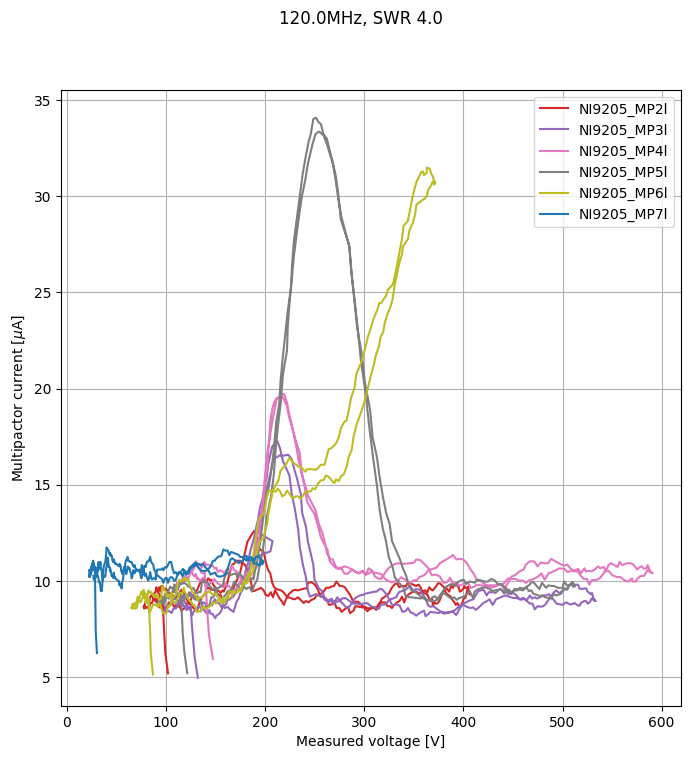

In [8]:
tail = 350  # this is approximatively the two last half-power cycles
_, _ = multipactor_test.sweet_plot(
    y_instrument,
    xdata=x_instrument,
    exclude=exclude,
    figsize=figsize,
    tail=tail,
)

In [9]:
power = multipactor_test.get_instrument(ins.ForwardPower)
assert isinstance(power, ins.ForwardPower)
growth_mask = power.growth_mask(minimum_number_of_points=10, n_trailing_points_to_check=5)
decrease_mask = ~growth_mask

In [10]:
masks = {
    "__(power grows)": growth_mask,
    "__(power decreases)": decrease_mask,
}

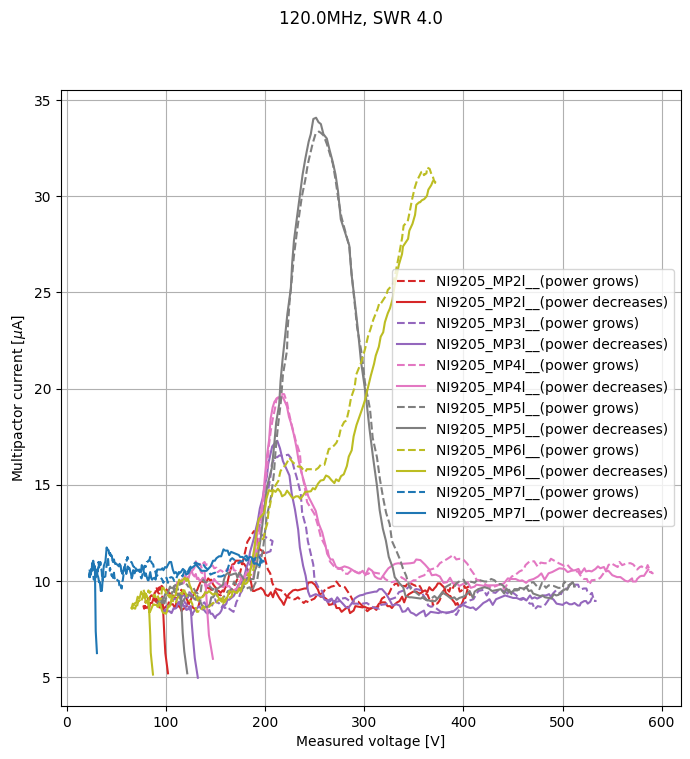

In [11]:
_, _ = multipactor_test.sweet_plot(
    y_instrument,
    xdata=x_instrument,
    exclude=exclude,
    figsize=figsize,
    tail=tail,
    masks=masks,
)